In [71]:
from load_data import *
from solver import *
from synthetic_graphs import plot_graph, signal_smoothness_on_graph, create_graph_from_laplacian
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load data, test functions and create graph

In [72]:
# Load data and desired columns
fuel_data = Fuel_data('../__data/Donnees-annuelles-de-consommation-de-produits-petroliers-par-departement-France-metropol.2022-09.csv')
fuel_data.truncate(keys_to_keep=[SUPER_PLOMBE, SUPER_SANS_PLOMB, GAZOLE], dpt)
print("num var", fuel_data.num_var)
print("num dpt", fuel_data.num_dpt)
print("num years", fuel_data.num_years)

SyntaxError: positional argument follows keyword argument (2638396032.py, line 3)

In [ ]:
#Test sample one year
samples_2005 = fuel_data.samples_one_year(2005)
print('samples', type(samples_2005))
print(samples_2005.shape)

samples <class 'numpy.ndarray'>
(94, 3)


In [ ]:
# Test sample by year
samples_super_plombe = fuel_data.samples_by_year(SUPER_PLOMBE)
print('samples', type(samples_super_plombe))
print(samples_super_plombe.shape)

samples <class 'numpy.ndarray'>
(94, 11)


<class 'list'>


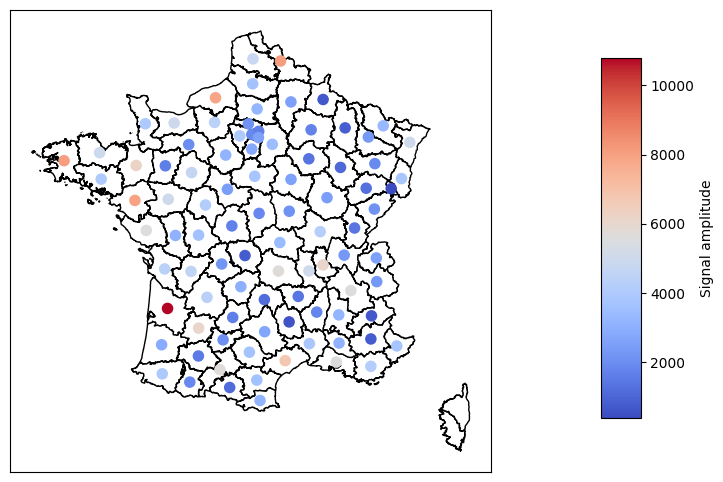

In [ ]:
# Test graph contruction
fuel_data.generate_graph()
print(type(fuel_data.graph.nodes[1]['pos']))
plot_graph_department(fuel_data.graph, samples_2005[:, 0])

## Estimate graph

num var 3
num dpt 12
num years 17


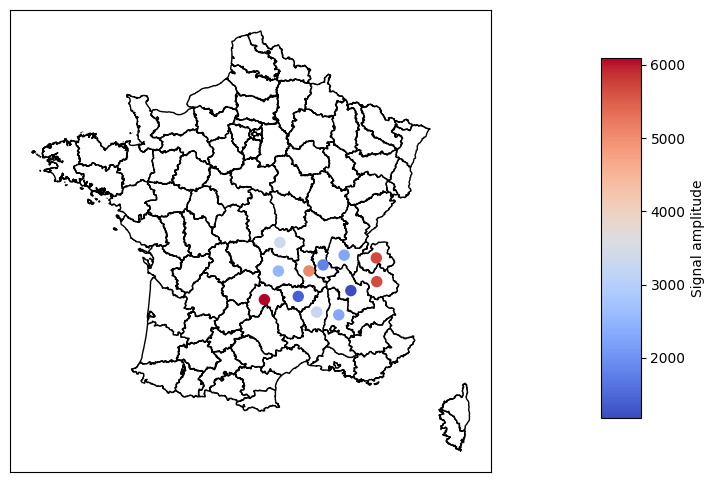

In [ ]:
#Load data
region_ARA = [1, 3, 7, 15, 26, 38, 42, 43, 63, 69, 73, 74] #dpt region Auvergne Rhones Alpes
fuel_data_ARA = Fuel_data('../__data/Donnees-annuelles-de-consommation-de-produits-petroliers-par-departement-France-metropol.2022-09.csv')
fuel_data_ARA.truncate(keys_to_keep=[SUPER_PLOMBE, SUPER_SANS_PLOMB, GAZOLE], dpt_to_keep=region_ARA)
print("num var", fuel_data_ARA.num_var)
print("num dpt", fuel_data_ARA.num_dpt)
print("num years", fuel_data_ARA.num_years)
samples_ARA_2005 = fuel_data_ARA.samples_one_year(2005)
fuel_data_ARA.generate_graph()
plot_graph_department(fuel_data_ARA.graph, samples_2005[:, 0])

In [ ]:
# Solver
# Solver parameters
max_iter = 1000
alpha = 1e-3
beta = 2e-3
solvers.options['show_progress'] = False
np.random.seed(3)
# Solving
L_est, Y_est = gl_sig_model(samples_ARA_2005.T, max_iter, alpha, beta)

(12, 12)
12.000000000000009


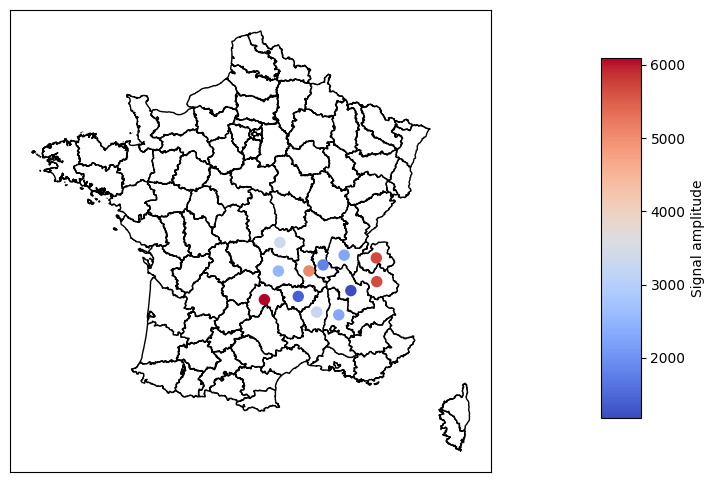

[[ 2.70171637e-07 -2.24966839e-11 -8.25625460e-12 -6.39103685e-12
  -3.04752543e-11 -7.78364001e-12 -2.68718111e-07 -9.56822282e-12
  -8.60124536e-10 -1.46772985e-12 -8.43205380e-11 -4.22640016e-10]
 [-2.24966839e-11  2.46710668e-10 -3.50327146e-11 -2.23023077e-11
  -7.74939297e-12 -3.25294820e-12 -2.04183921e-11 -4.58611277e-11
  -2.18317188e-11 -8.01509624e-13 -5.03679937e-11 -1.65958437e-11]
 [-8.25625460e-12 -3.50327146e-11  3.60353618e-09 -2.01161215e-10
  -3.87048232e-12 -1.94411366e-12 -7.77234502e-12 -3.31661252e-09
  -8.18066434e-12 -4.82012264e-13 -1.34328417e-11 -6.79156561e-12]
 [-6.39103685e-12 -2.23023077e-11 -2.01161215e-10  3.33553080e-10
  -3.21654130e-12 -1.65299065e-12 -6.03439932e-12 -7.09061128e-11
  -6.29623136e-12 -3.95500835e-13 -9.87252628e-12 -5.32613801e-12]
 [-3.04752543e-11 -7.74939297e-12 -3.87048232e-12 -3.21654130e-12
   1.89827785e-10 -1.95321439e-11 -3.30217189e-11 -4.37402406e-12
  -2.91481070e-11 -2.41691256e-12 -1.58932943e-11 -4.01304220e-11]
 [-7.

In [86]:
print(L_est.shape)
print(np.sum(np.diag(L_est)))
g_ARA_est = create_graph_from_laplacian(L_est, list(fuel_data_ARA.graph.nodes))
for node in g_ARA_est.nodes :
    g_ARA_est.nodes[node]['pos'] = fuel_data_ARA.graph.nodes[node]['pos']
plot_graph_department(g_ARA_est, samples_ARA_2005[:, 0])
print(L_est)
print(np.diag(L_est))
